In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

How the genre of a movie effect the revenue earned by the distributors ? 

In [2]:
url <- "https://raw.githubusercontent.com/rehan13/DSCI-100-Project-Group25/main/AnnualTicketSales.csv"
download.file(url, destfile = "AnnualTicketSales.csv")


In [3]:
annual_sale_data <- read_csv("AnnualTicketSales.csv")

annual_sale_data

Parsed with column specification:
cols(
  YEAR = col_double(),
  TICKETS_SOLD = col_number(),
  TOTAL_BOX_OFFICE = col_character(),
  TOTAL_INFLATION_ADJUSTED_BOX_OFFICE = col_character(),
  AVERAGE_TICKET_PRICE = col_character()
)



YEAR,TICKETS_SOLD,TOTAL_BOX_OFFICE,TOTAL_INFLATION_ADJUSTED_BOX_OFFICE,AVERAGE_TICKET_PRICE
<dbl>,<dbl>,<chr>,<chr>,<chr>
2021,423774881,"$3,881,777,912","$3,881,777,912",$9.16
2020,223638958,"$2,048,534,616","$2,048,534,616",$9.16
2019,1228541629,"$11,253,443,955","$11,253,444,050",$9.16
⋮,⋮,⋮,⋮,⋮
1997,1357349648,"$6,230,235,770","$12,433,322,785",$4.59
1996,1305221290,"$5,769,078,886","$11,955,781,912",$4.42
1995,1221705907,"$5,314,421,390","$11,190,826,105",$4.35


In [4]:
url <- "https://raw.githubusercontent.com/rehan13/DSCI-100-Project-Group25/main/HighestGrossers.csv"
download.file(url, destfile = "HighestGrossers.csv")

In [5]:
Highest_grosser_data <- read_csv("HighestGrossers.csv")

Highest_grosser_data

Parsed with column specification:
cols(
  YEAR = col_double(),
  MOVIE = col_character(),
  GENRE = col_character(),
  MPAA_RATING = col_character(),
  DISTRIBUTOR = col_character(),
  TOTAL_FOR_YEAR_IN_DOLLARS = col_number(),
  TOTAL_IN_2019_DOLLARS = col_number(),
  TICKETS_SOLD = col_number()
)



YEAR,MOVIE,GENRE,MPAA_RATING,DISTRIBUTOR,TOTAL_FOR_YEAR_IN_DOLLARS,TOTAL_IN_2019_DOLLARS,TICKETS_SOLD
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1995,Batman Forever,Drama,PG-13,Warner_Bros.,184031112,387522978,42306002
1996,Independence Day,Adventure,PG-13,20th_Century_Fox,306169255,634504608,69269062
1997,Men in Black,Adventure,PG-13,Sony_Pictures,250650052,500207943,54607854
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2019,Avengers: Endgame,Action,PG-13,Walt_Disney,858373000,858373002,93708843
2020,Bad Boys For Life,Action,R,Sony_Pictures,204417855,204417848,22316359
2021,Shang-Chi and the Legend of the Ten Rings,Action,PG-13,Walt_Disney,224226704,224226704,24478897


In [6]:
Drama <- filter(Highest_grosser_data, GENRE == "Drama")
Drama

YEAR,MOVIE,GENRE,MPAA_RATING,DISTRIBUTOR,TOTAL_FOR_YEAR_IN_DOLLARS,TOTAL_IN_2019_DOLLARS,TICKETS_SOLD
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1995,Batman Forever,Drama,PG-13,Warner_Bros.,184031112,387522978,42306002


In [7]:
Adventure <- filter(Highest_grosser_data, GENRE == "Adventure")
Adventure

YEAR,MOVIE,GENRE,MPAA_RATING,DISTRIBUTOR,TOTAL_FOR_YEAR_IN_DOLLARS,TOTAL_IN_2019_DOLLARS,TICKETS_SOLD
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1996,Independence Day,Adventure,PG-13,20th_Century_Fox,306169255,634504608,69269062
1997,Men in Black,Adventure,PG-13,Sony_Pictures,250650052,500207943,54607854
1998,Titanic,Adventure,PG-13,Paramount_Pictures,443319081,865842808,94524324
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2012,The Avengers,Adventure,PG-13,Walt_Disney,623357910,717331462,78311295
2013,Iron Man 3,Adventure,PG-13,Walt_Disney,408992272,460808016,50306552
2014,Guardians of the Galaxy,Adventure,PG-13,Walt_Disney,333055258,373413235,40765637


In [8]:
Sum_adventure_revenue <- sum(Adventure$TOTAL_IN_2019_DOLLARS)
Sum_adventure_revenue

[1] 8173858097

In [9]:
Total_Revenue_Adventure <- Adventure %>%
group_by(DISTRIBUTOR) %>% 
   summarize(Total_Revenue_In_2019_Dollars = sum(TOTAL_IN_2019_DOLLARS,na.rm = TRUE))
Total_Revenue_Adventure

`summarise()` ungrouping output (override with `.groups` argument)



DISTRIBUTOR,Total_Revenue_In_2019_Dollars
<chr>,<dbl>
20th_Century_Fox,1410658357
Dreamworks_SKG,650826473
Paramount_Pictures,865842808
⋮,⋮
Universal,430583644
Walt_Disney,2067603059
Warner_Bros.,1163600662


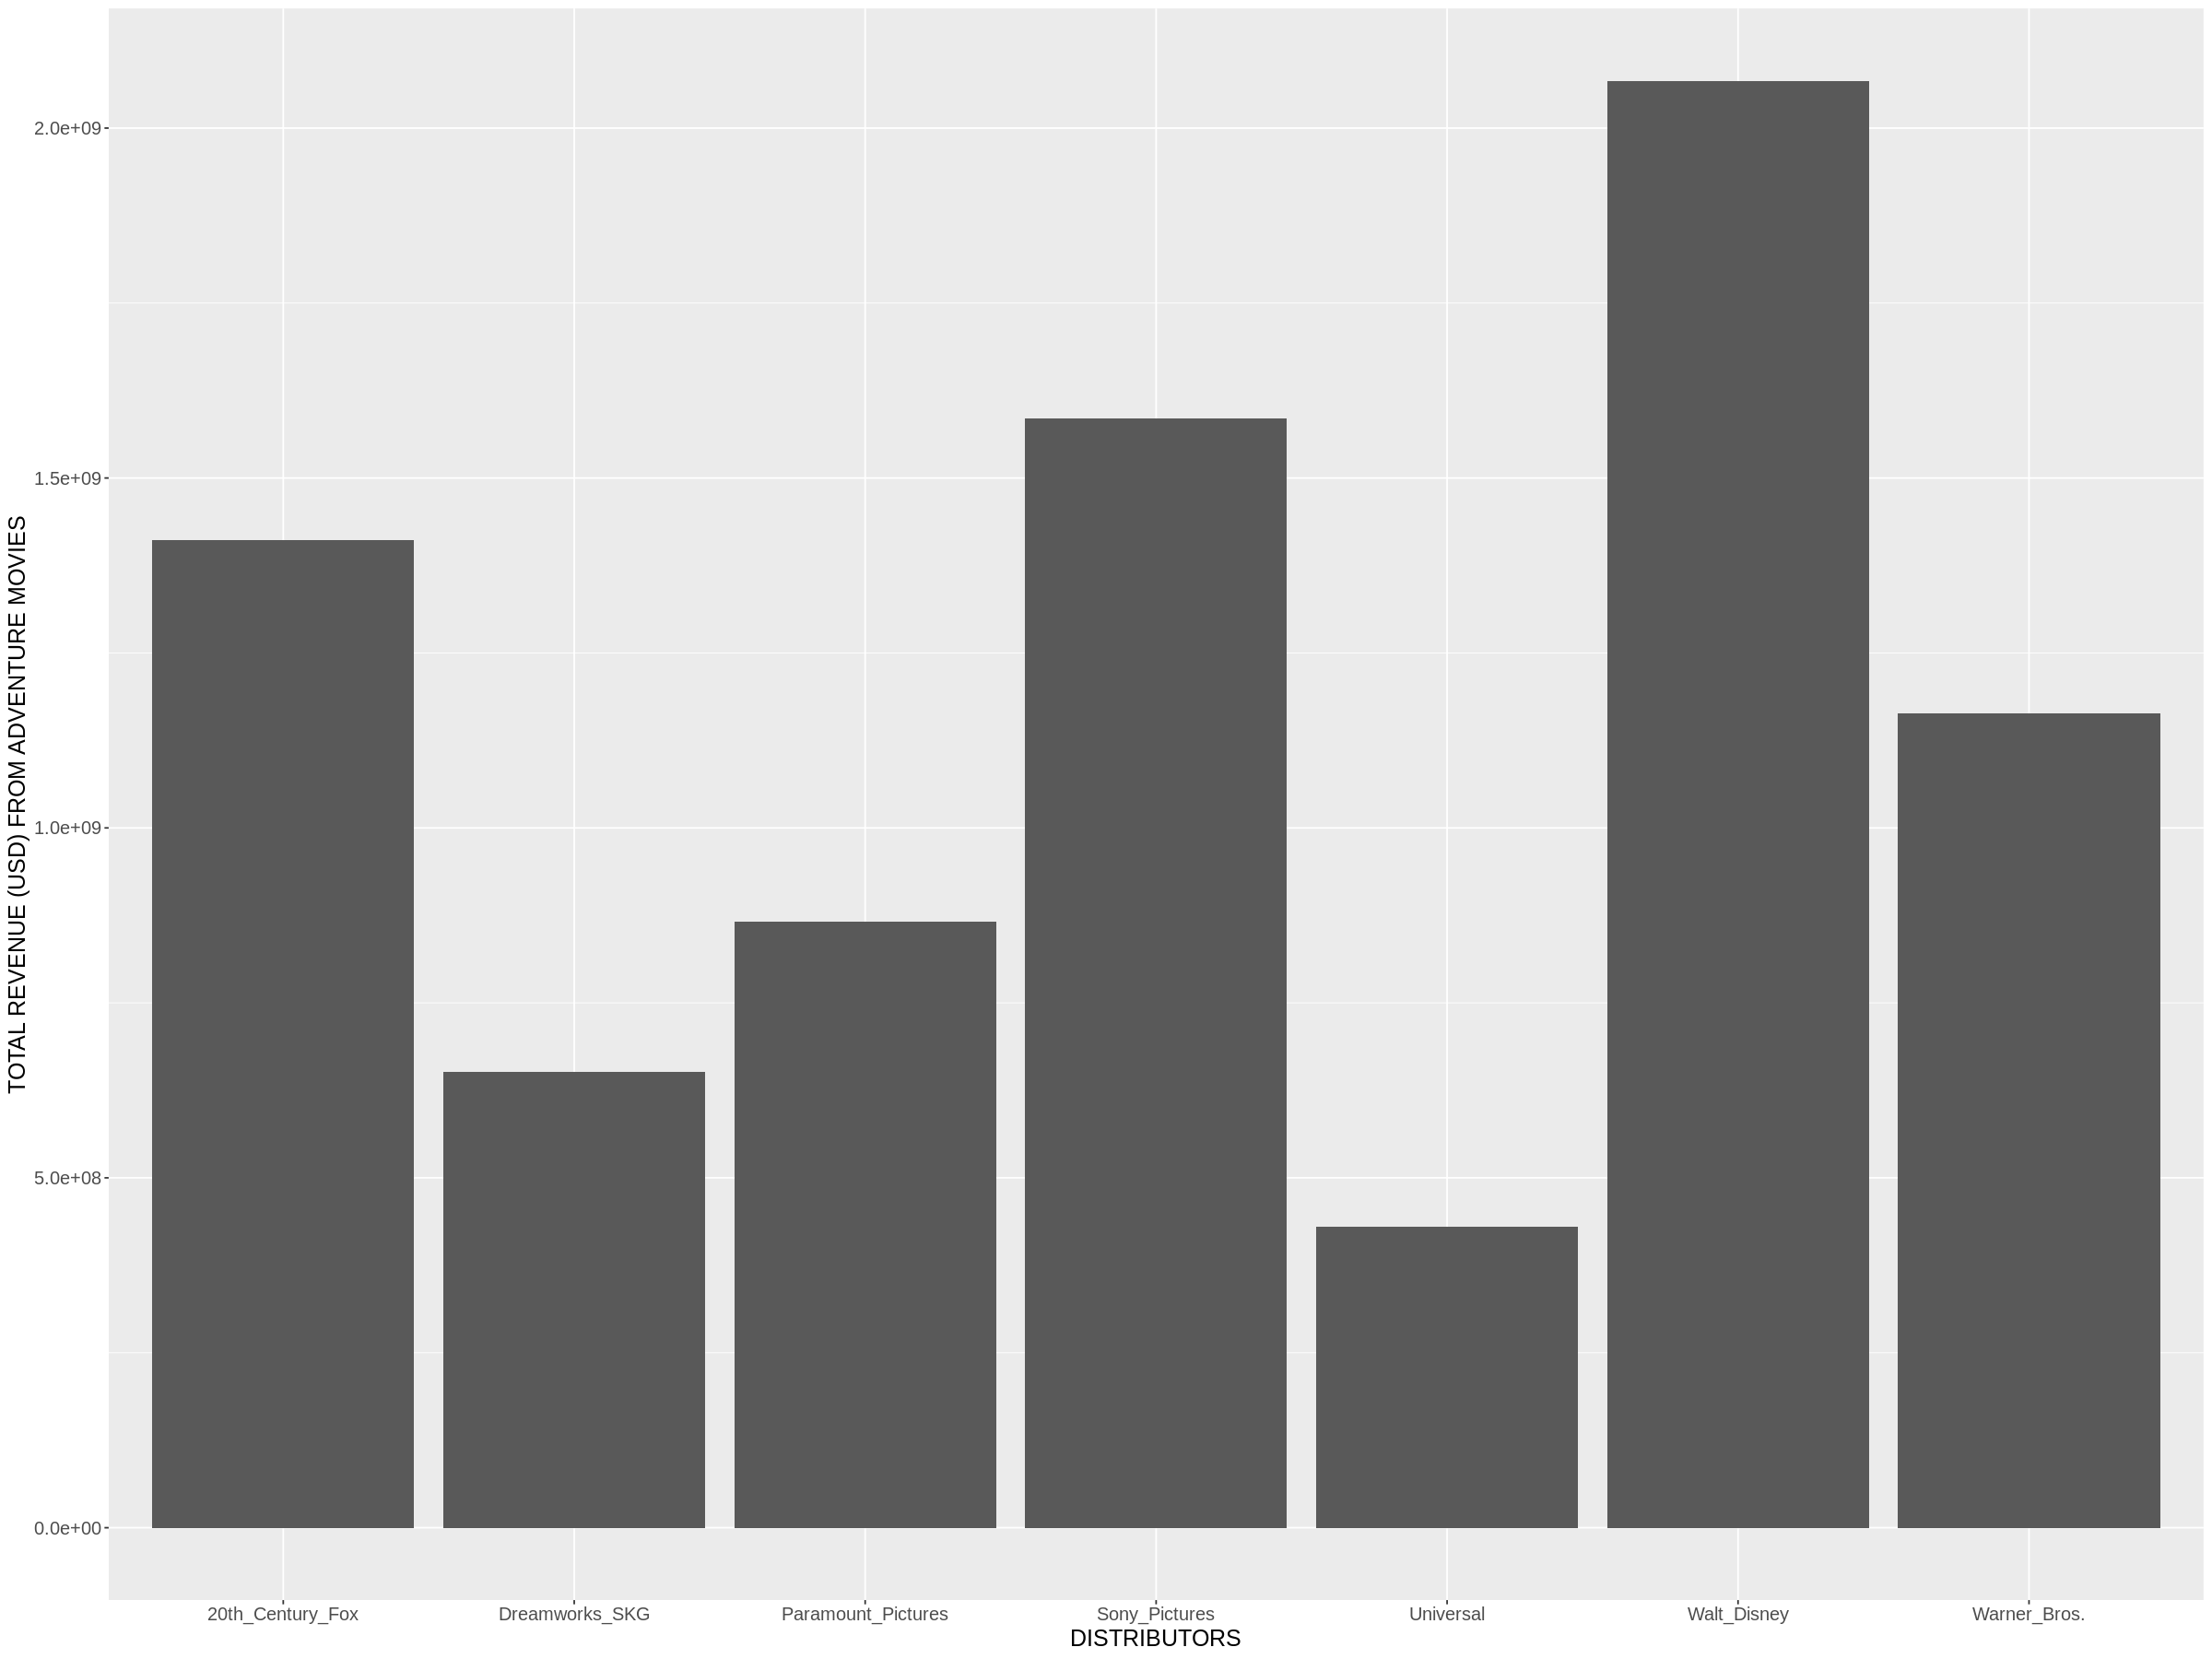

In [10]:
options(repr.plot.width = 20, repr.plot.height = 15)

Revenue_By_Distributor_Adventure <- Total_Revenue_Adventure %>%
   ggplot(aes(x = DISTRIBUTOR, y = Total_Revenue_In_2019_Dollars)) + 
       geom_bar(stat = "Identity") +
       xlab("DISTRIBUTORS") + 
       ylab("TOTAL REVENUE (USD) FROM ADVENTURE MOVIES") +
       theme(text = element_text(size=15))
Revenue_By_Distributor_Adventure

Random again

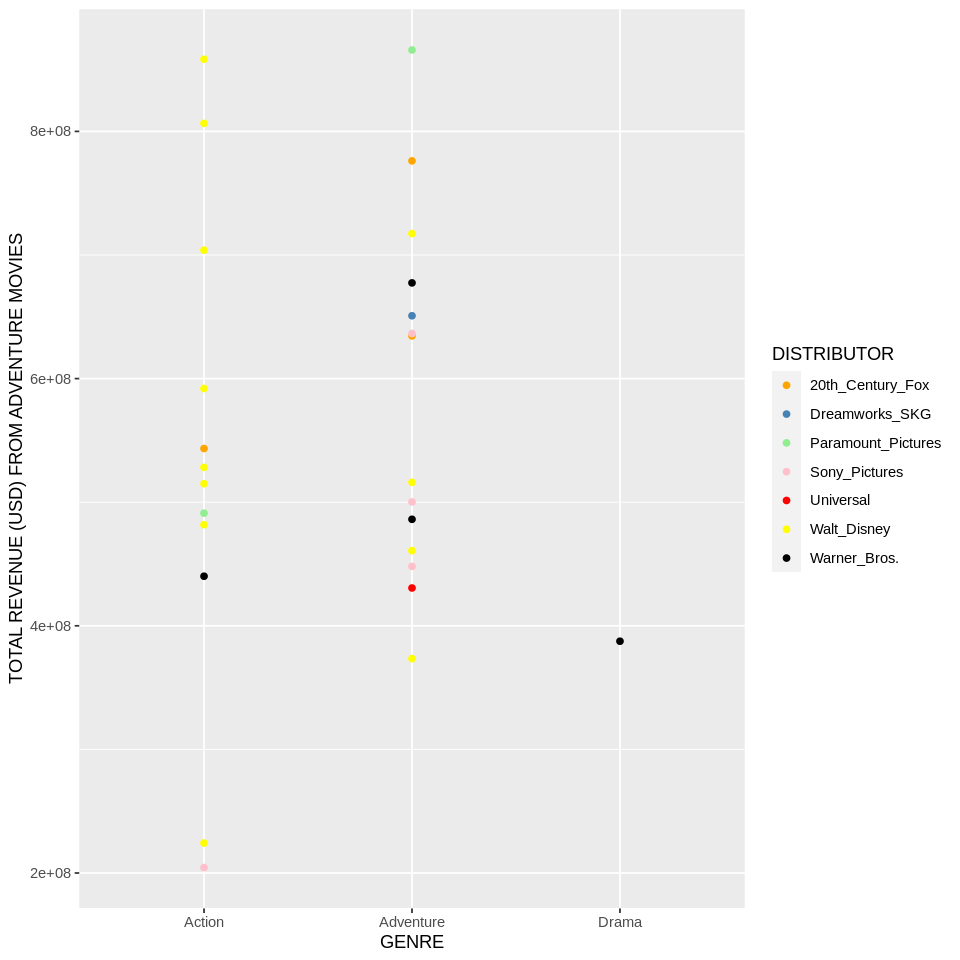

In [20]:
options(repr.plot.width = 8, repr.plot.height = 8)
Revenue_By_Distributor <- Highest_grosser_data %>%
ggplot(aes(x = GENRE, y = TOTAL_IN_2019_DOLLARS , colour = DISTRIBUTOR))+
geom_point() +
labs(x = "GENRE", y = "TOTAL REVENUE (USD) FROM ADVENTURE MOVIES", Colour = "DISTRIBUTOR")+
scale_colour_manual(labels = c("20th_Century_Fox", "Dreamworks_SKG", "Paramount_Pictures", "Sony_Pictures", "Universal", "Walt_Disney", "Warner_Bros."), values = c("orange", "steelblue", "lightgreen", "pink", "red", "yellow", "black"))
Revenue_By_Distributor
